In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymysql
import getpass

%matplotlib inline

# Introduction to Matplotlib

## Plot monhtly revenue (olist)

In [3]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="ironhack",
                       passwd=getpass.getpass(),
                       db="olist")

········


In [4]:
order_items = pd.read_sql("SELECT * FROM order_items", conn)
orders = pd.read_sql("SELECT * FROM orders", conn)

In [5]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**1. Join the two tables**

In [10]:
price_ts = order_items.merge(orders, on="order_id")[["price", "order_purchase_timestamp"]]

In [11]:
price_ts.head()

,price,order_purchase_timestamp
0,58.90,2017-09-13 08:59:02
1,239.90,2017-04-26 10:53:06
2,199.00,2018-01-14 14:33:31
3,12.99,2018-08-08 10:00:35
4,199.90,2017-02-04 13:57:51


| month_id | SUM(price) |
|----------|---------|
| 2017-01  | 9358195 |
| 2017-02  | 3150902 |
| ...      | ...     |

In [23]:
price_ts = price_ts.assign(month_id='YYYY-MM')

In [24]:
price_ts.dtypes

price                              float64
order_purchase_timestamp    datetime64[ns]
month_id                            object
dtype: object

In [25]:
price_ts["order_purchase_timestamp"].dt.year

0         2017
1         2017
2         2018
3         2018
4         2017
          ... 
112641    2018
112642    2018
112643    2017
112644    2017
112645    2018
Name: order_purchase_timestamp, Length: 112646, dtype: int64

In [16]:
price_ts["order_purchase_timestamp"].dt.month

0          9
1          4
2          1
3          8
4          2
          ..
112641     4
112642     7
112643    10
112644     8
112645     6
Name: order_purchase_timestamp, Length: 112646, dtype: int64

In [17]:
price_ts["order_purchase_timestamp"].dt.year + price_ts["order_purchase_timestamp"].dt.month

0         2026
1         2021
2         2019
3         2026
4         2019
          ... 
112641    2022
112642    2025
112643    2027
112644    2025
112645    2024
Name: order_purchase_timestamp, Length: 112646, dtype: int64

In [19]:
price_ts["order_purchase_timestamp"].dt.year.astype(str) + "-" + price_ts["order_purchase_timestamp"].dt.month.astype(str)

0          2017-9
1          2017-4
2          2018-1
3          2018-8
4          2017-2
           ...   
112641     2018-4
112642     2018-7
112643    2017-10
112644     2017-8
112645     2018-6
Name: order_purchase_timestamp, Length: 112646, dtype: object

In [27]:
price_ts["month_id"] = pd.to_datetime(price_ts["order_purchase_timestamp"].dt.strftime("%Y-%m-01"))

In [31]:
price_ts.head()

,price,order_purchase_timestamp,month_id
0,58.90,2017-09-13 08:59:02,2017-09-01
1,239.90,2017-04-26 10:53:06,2017-04-01
2,199.00,2018-01-14 14:33:31,2018-01-01
3,12.99,2018-08-08 10:00:35,2018-08-01
4,199.90,2017-02-04 13:57:51,2017-02-01


In [30]:
price_ts.dtypes

price                              float64
order_purchase_timestamp    datetime64[ns]
month_id                    datetime64[ns]
dtype: object

In [44]:
(price_ts
 .groupby("month_id")
 .agg({"price": np.sum})
 .rename(columns={"price": "revenue"}))

,revenue
month_id,
2016-09-01,267.36
2016-10-01,49507.66
2016-12-01,10.90
2017-01-01,120312.87
2017-02-01,247303.02
2017-03-01,374198.32
2017-04-01,359927.23
2017-05-01,505871.16
2017-06-01,433038.60


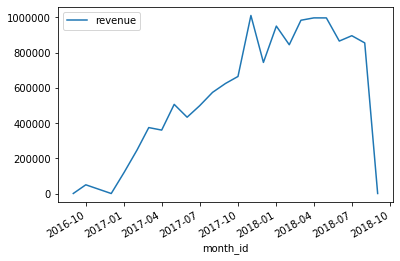

In [46]:
(price_ts
 .groupby("month_id")
 .agg({"price": np.sum})
 .rename(columns={"price": "revenue"})).plot();

In [54]:
monthly_rev = (price_ts
               .groupby("month_id", as_index=False)
               .agg({"price": np.sum})
               .rename(columns={"price": "revenue"}))

In [60]:
monthly_rev.dtypes

month_id    datetime64[ns]
revenue            float64
dtype: object

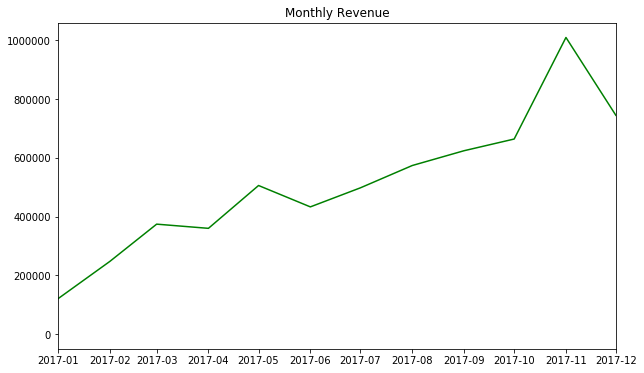

In [68]:
fig, ax = plt.subplots(figsize=(10,6))

# draw the graph
ax.plot(monthly_rev["month_id"],
        monthly_rev["revenue"],
        color="green");

ax.set_title("Monthly Revenue");
ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-01")));